# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [21]:
# import numpy and pandas
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (12,8)

# Challenge 1 - Independent Sample T-tests

In this challenge, we will be using the Pokemon dataset. Before applying statistical methods to this data, let's first examine the data.

To load the data, run the code below.

In [2]:
# Run this code:
pokemon = pd.read_csv('../pokemon.csv')

Let's start off by looking at the `head` function in the cell below.

In [3]:
# Your code here:
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


The first thing we would like to do is compare the legendary Pokemon to the regular Pokemon. To do this, we should examine the data further. What is the count of legendary vs. non legendary Pokemons?

In [7]:
# Your code here:
legendary = pokemon[pokemon['Legendary'] == True]
non_legendary = pokemon[pokemon['Legendary'] == False]

In [8]:
print(f'There are {len(legendary)} legendary Pokemons.')
print(f'There are {len(non_legendary)} non legendary Pokemons.')

There are 65 legendary Pokemons.
There are 735 non legendary Pokemons.


Compute the mean and standard deviation of the total points for both legendary and non-legendary Pokemon.

In [12]:
# Your code here:
mean_legendary = np.mean(legendary['Total'])
std_legendary = np.std(legendary['Total'])
print(f'Legendary Pokemon\nmean: {mean_legendary}\nstandard deviation: {std_legendary}\n')

mean_non_legendary = np.mean(non_legendary['Total'])
std_non_legendary = np.std(non_legendary['Total'])
print(f'Non Legendary Pokemon\nmean: {mean_non_legendary}\nstandard deviation: {std_non_legendary}')

Legendary Pokemon
mean: 637.3846153846154
standard deviation: 60.46682302213781

Non Legendary Pokemon
mean: 417.21360544217686
standard deviation: 106.68776660321996


The computation of the mean might give us a clue regarding how the statistical test may turn out; However, it certainly does not prove whether there is a significant difference between the two groups.

In the cell below, use the `ttest_ind` function in `scipy.stats` to compare the the total points for legendary and non-legendary Pokemon. Since we do not have any information about the population, assume the variances are not equal.

In [14]:
# Your code here:
# Ho: no hay diferencias significativas entre las medias de ambos grupos (es la misma)
# Ha: hay diferencias significativas entre las medias de ambos grupos (no es la misma)
stats.ttest_ind(legendary['Total'], non_legendary['Total'], equal_var=False)

Ttest_indResult(statistic=25.8335743895517, pvalue=9.357954335957446e-47)

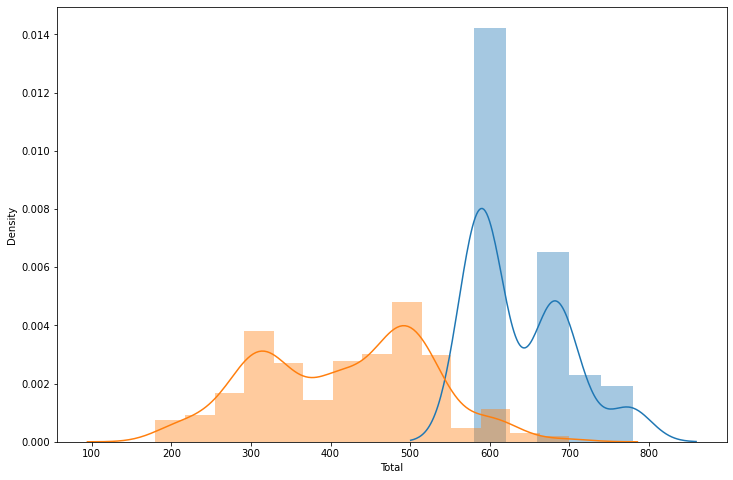

In [22]:
_ = sns.distplot(legendary['Total'])
_ = sns.distplot(non_legendary['Total'])

What do you conclude from this test? Write your conclusions below.

In [23]:
# El p-value es bastante más pequeño que 0.05, por lo que rechazamos la hipótesis nula y concluimos que sí que hay diferencia significativa en las medias entre ambos grupos y, por lo tanto, no son las mismas.

How about we try to compare the different types of pokemon? In the cell below, list the types of Pokemon from column `Type 1` and the count of each type.

In [27]:
# Your code here:
pokemon['Type 1'].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Ground       32
Ghost        32
Dragon       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

Since water is the largest group of Pokemon, compare the mean and standard deviation of water Pokemon to all other Pokemon.

In [28]:
# Your code here:
water = pokemon[pokemon['Type 1'] == 'Water']
non_water = pokemon[pokemon['Type 1'] != 'Water']

mean_water = np.mean(water['Total'])
std_water = np.std(water['Total'])
print(f'Water Pokemon\nmean: {mean_water}\nstandard deviation: {std_water}\n')

mean_non_water = np.mean(non_water['Total'])
std_non_water = np.std(non_water['Total'])
print(f'Non Water Pokemon\nmean: {mean_non_water}\nstandard deviation: {std_non_water}')

Water Pokemon
mean: 430.45535714285717
standard deviation: 112.68182832909096

Non Water Pokemon
mean: 435.85901162790697
standard deviation: 121.00364762501167


Perform a hypothesis test comparing the mean of total points for water Pokemon to all non-water Pokemon. Assume the variances are equal. 

In [29]:
# Your code here:
# Ho: no hay diferencias significativas entre las medias de ambos grupos (es la misma)
# Ha: hay diferencias significativas entre las medias de ambos grupos (no es la misma)
stats.ttest_ind(water['Total'], non_water['Total'], equal_var=False)

Ttest_indResult(statistic=-0.4638681676327303, pvalue=0.6433915385821449)

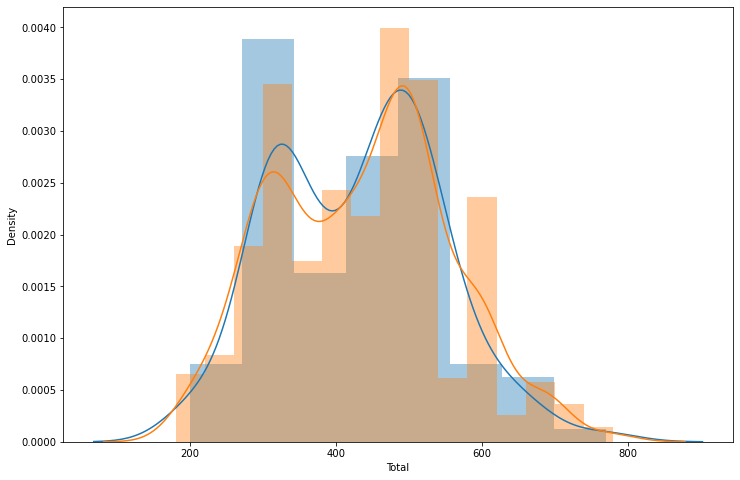

In [30]:
_ = sns.distplot(water['Total'])
_ = sns.distplot(non_water['Total'])

Write your conclusion below.

In [10]:
# Aquí ya se puede apreciar que las medias son muy similares, y el p-value no hace sino confirmarlo. De este modo (p-value > 0.05), aceptamos la Ho y concluimos que no hay diferencias significativas en las medias entre ambos grupos.

# Challenge 2 - Matched Pairs Test

In this challenge we will compare dependent samples of data describing our Pokemon. Our goal is to see whether there is a significant difference between each Pokemon's defense and attack scores. Our hypothesis is that the defense and attack scores are equal. In the cell below, import the `ttest_rel` function from `scipy.stats` and compare the two columns to see if there is a statistically significant difference between them.

In [31]:
# Your code here:
# Ho: 'Defense' and 'Attack' scores are equal
# Ha: 'Defense' and 'Attack' scores are not equal

alpha = 0.05

# Attack vs Defense
stat, p_value = stats.ttest_rel(pokemon['Attack'], pokemon['Defense'])

print(f'Attack vs Defense\np-value = {p_value}\np-value <= {alpha}? {p_value <= alpha}')

Attack vs Defense
p-value = 1.7140303479358558e-05
p-value <= 0.05? True


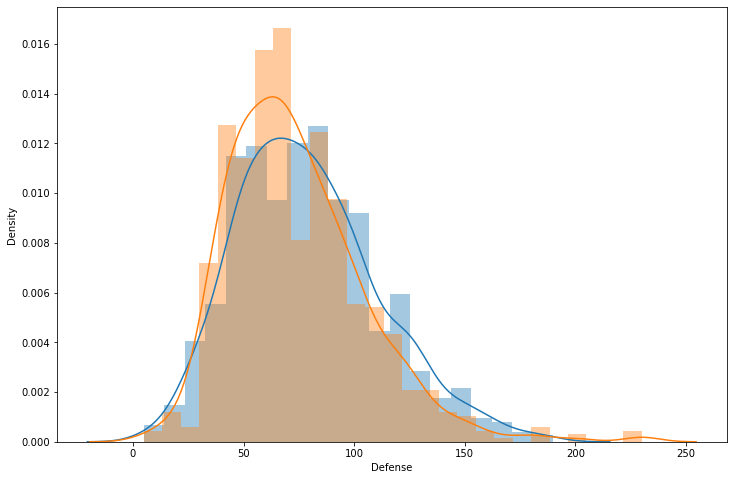

In [32]:
_ = sns.distplot(pokemon['Attack'])
_ = sns.distplot(pokemon['Defense'])

Describe the results of the test in the cell below.

In [12]:
# Al ser el p-value menor a 0.05, rechazamos la hipótesis nula y por tanto concluimos que los stats de defensa y ataque no son iguales.

We are also curious about whether therer is a significant difference between the mean of special defense and the mean of special attack. Perform the hypothesis test in the cell below. 

In [33]:
# Your code here:
# Ho: 'Sp. Def' and 'Sp. Atk' scores are equal
# Ha: 'Sp. Def' and 'Sp. Atk' scores are not equal

alpha = 0.05

# Sp. Atk vs Sp. Def
stat, p_value = stats.ttest_rel(pokemon['Sp. Atk'], pokemon['Sp. Def'])

print(f'Sp. Atk vs Sp. Def\np-value = {p_value}\np-value <= {alpha}? {p_value <= alpha}')

Sp. Atk vs Sp. Def
p-value = 0.3933685997548122
p-value <= 0.05? False


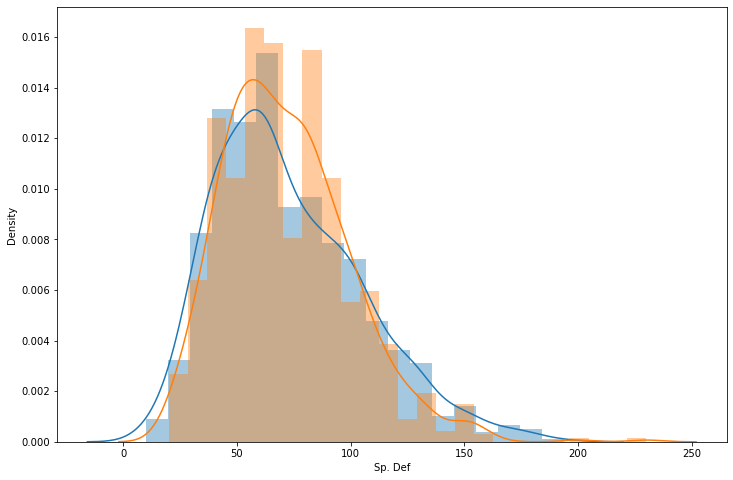

In [34]:
_ = sns.distplot(pokemon['Sp. Atk'])
_ = sns.distplot(pokemon['Sp. Def'])

Describe the results of the test in the cell below.

In [14]:
# En este caso, al ser el p-value mayor a 0.05, sí que aceptamos la hipótesis nula y por tanto concluimos que los stats de ataque especial y defensa especial son muy similares.

As you may recall, a two sample matched pairs test can also be expressed as a one sample test of the difference between the two dependent columns.

Import the `ttest_1samp` function and perform a one sample t-test of the difference between defense and attack. Test the hypothesis that the difference between the means is zero. Confirm that the results of the test are the same.

In [37]:
# Your code here:
stats.ttest_1samp(pokemon['Attack'] - pokemon['Defense'], 0)

Ttest_1sampResult(statistic=4.325566393330478, pvalue=1.7140303479358558e-05)

In [39]:
stats.ttest_rel(pokemon['Attack'], pokemon['Defense']) == stats.ttest_1samp(pokemon['Attack'] - pokemon['Defense'], 0)

True

# Bonus Challenge - The Chi-Square Test

The Chi-Square test is used to determine whether there is a statistically significant difference in frequencies. In other words, we are testing whether there is a relationship between categorical variables or rather when the variables are independent. This test is an alternative to Fisher's exact test and is used in scenarios where sample sizes are larger. However, with a large enough sample size, both tests produce similar results. Read more about the Chi Squared test [here](https://en.wikipedia.org/wiki/Chi-squared_test).

In the cell below, create a contingency table using `pd.crosstab` comparing whether a Pokemon is legenadary or not and whether the Type 1 of a Pokemon is water or not.

In [43]:
# Your code here:
crosstab = pd.crosstab(pokemon['Legendary'], pokemon['Type 1'] == 'Water')
crosstab

Type 1,False,True
Legendary,,
False,627,108
True,61,4


Perform a chi-squared test using the `chi2_contingency` function in `scipy.stats`. You can read the documentation of the function [here](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.chi2_contingency.html).

In [46]:
# Your code here:
# Ho: The variables are independent
# Ha: The variables are not independent

alpha = 0.05
chi2, p_value, dof, expected = stats.chi2_contingency(crosstab)
# chi2: The test statistic
# p_value: The p-value of the test
# dof: Degrees of freedom
# expected: The expected frequencies, based on the marginal sums of the table

print(f'p-value = {p_value}\np-value <= {alpha}? {p_value <= alpha}')

p-value = 0.08625467249550949
p-value <= 0.05? False


Based on a 95% confidence, should we reject the null hypothesis?

In [19]:
# El p-value es mayor a 0.05, con lo que aceptamos la hipótesis nula y concluimos que las variables son independientes.